In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path
from pylab import rcParams

rcParams['figure.figsize'] = 20, 10

In [2]:
all_data_file_path = os.path.join("files", "our_pr_data.csv")
need_data_file_path = os.path.join("files", "open_pr_data.csv")

In [3]:
all_df = pd.read_csv(all_data_file_path)
del all_df['Data']
need_df = pd.read_csv(need_data_file_path)
df = pd.merge(all_df, need_df, how='inner', on=['Domain'])
df.head()

,Domain,OurPR,OpenPR
0,twitter.com,0.008193,10
1,youtube.com,0.003563,10
2,developers.facebook.com,0.003108,7.16
3,github.com,0.002569,8.67
4,google.com,0.002319,10


In [4]:
df.describe()

,OurPR
count,565.000000
mean,0.000081
std,0.000429
min,0.000018
25%,0.000019
50%,0.000023
75%,0.000043
max,0.008193


In [5]:
# Remove empty lines
df['OpenPR'].replace('', np.nan, inplace=True)
df['OpenPR'].replace('-', np.nan, inplace=True)
df.dropna(subset=['OpenPR'], inplace=True)
df.describe()
df = df.astype({'OpenPR': 'float64'})
df.dtypes

Domain     object
OurPR     float64
OpenPR    float64
dtype: object

In [6]:
#normalize cols
df['OurPR'] = df['OurPR'] / df['OurPR'].sum()
df['OpenPR'] = df['OpenPR'] / df['OpenPR'].sum()

df.describe()
df.head()


,Domain,OurPR,OpenPR
0,twitter.com,0.177935,0.002780
1,youtube.com,0.077378,0.002780
2,developers.facebook.com,0.067501,0.001991
3,github.com,0.055797,0.002411
4,google.com,0.050368,0.002780


In [7]:
# should sum up to one after normalization
print(sum(df['OurPR']))
print(sum(df['OpenPR']))

0.9999999999999988
0.9999999999999992


<AxesSubplot:>

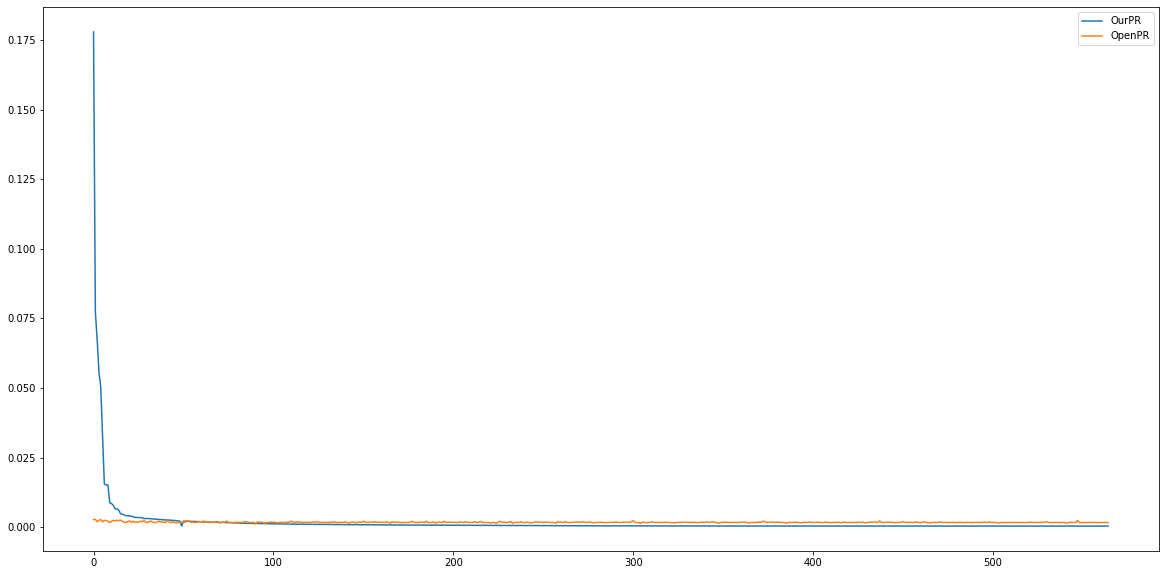

In [8]:
df.plot()

In [9]:
df = df.sort_values(by='OurPR', ascending = False)
df = df.reset_index(drop=True)
df['OurPR_Index'] = df.index
df = df.sort_values(by='OpenPR', ascending = False)
df = df.reset_index(drop=True)
df['OpenPR_Index'] = df.index

df.head()

,Domain,OurPR,OpenPR,OurPR_Index,OpenPR_Index
0,twitter.com,0.177935,0.002780,0,0
1,google.com,0.050368,0.002780,4,1
2,youtube.com,0.077378,0.002780,1,2
3,plus.google.com,0.004854,0.002577,15,3
4,youtu.be,0.003135,0.002488,28,4


<AxesSubplot:xlabel='OpenPR_Index', ylabel='OurPR_Index'>

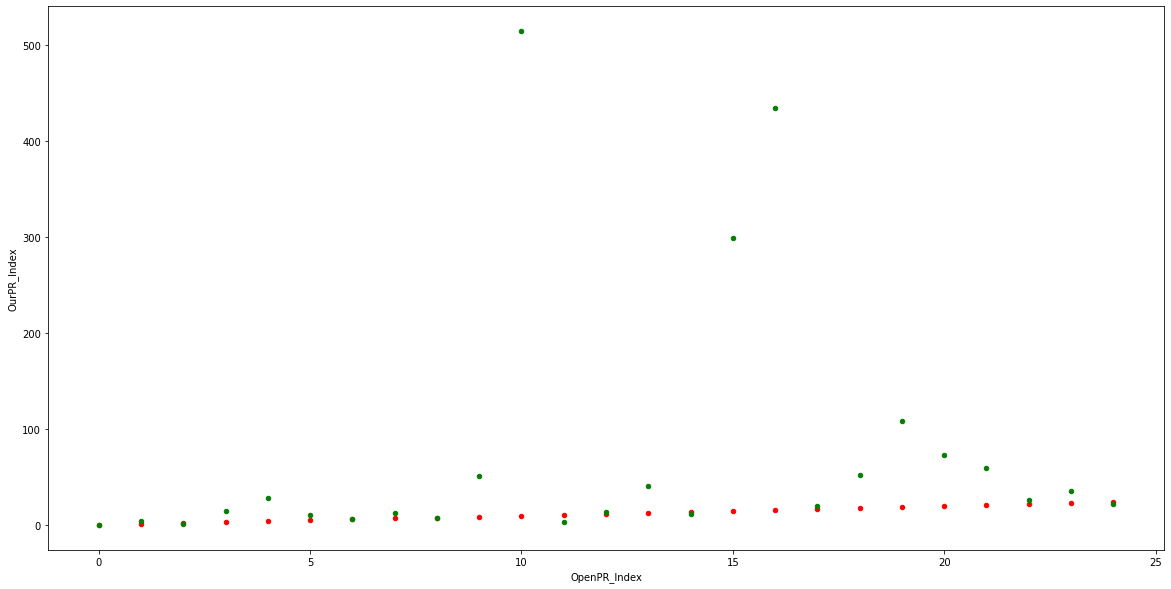

In [10]:
df_head = df.head(25)
ax1 = df_head.plot.scatter(x='OpenPR_Index', y='OpenPR_Index', color='r')
df_head.plot.scatter(x='OpenPR_Index', y='OurPR_Index', color='g', ax=ax1)